In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:

raw_dataset = pd.read_csv('NY data summary.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,193.187111,5.93,46445,18798.114,4.8,1096833.984,687.3941,32.90%,214701,0.90%,5852.065587,2.39,186.9
1,4/1/2005,195.162335,5.86,46445,18798.114,4.8,1096833.984,687.3941,32.90%,214701,0.90%,4700.094832,2.74,187.9
2,5/1/2005,196.732454,5.72,46445,18798.114,4.7,1096833.984,687.3941,32.90%,214701,0.90%,4978.336136,2.65,188.4
3,6/1/2005,198.197612,5.58,46445,18798.114,4.8,1096833.984,687.3941,32.90%,215976,0.80%,4541.492838,2.49,187.6
4,7/1/2005,199.811814,5.70,46445,18798.114,4.8,1096833.984,687.3941,32.90%,215976,0.80%,4545.705558,2.50,189.2
5,8/1/2005,201.500557,5.82,46445,18798.114,4.9,1096833.984,687.3941,32.90%,215976,0.80%,5644.986814,2.24,191.3
6,9/1/2005,204.075072,5.77,46445,18798.114,5.0,1096833.984,687.3941,32.70%,218751,0.90%,4939.945161,1.93,195.5
7,10/1/2005,206.680701,6.07,46445,18798.114,5.0,1096833.984,687.3941,32.70%,218751,0.90%,4275.704563,1.99,194.5
8,11/1/2005,209.323123,6.33,46445,18798.114,5.0,1096833.984,687.3941,32.70%,218751,0.90%,4456.121242,2.27,193.1
9,12/1/2005,212.054408,6.27,46445,18798.114,4.9,1096833.984,687.3941,32.50%,222198,0.90%,4594.430120,2.47,191.8


In [ ]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,193.187111,5.93,46445,18798.114,4.8,1096833.984,687.3941,214701,5852.065587,2.39,186.9,32.9,0.9
1,4/1/2005,195.162335,5.86,46445,18798.114,4.8,1096833.984,687.3941,214701,4700.094832,2.74,187.9,32.9,0.9
2,5/1/2005,196.732454,5.72,46445,18798.114,4.7,1096833.984,687.3941,214701,4978.336136,2.65,188.4,32.9,0.9
3,6/1/2005,198.197612,5.58,46445,18798.114,4.8,1096833.984,687.3941,215976,4541.492838,2.49,187.6,32.9,0.8
4,7/1/2005,199.811814,5.70,46445,18798.114,4.8,1096833.984,687.3941,215976,4545.705558,2.50,189.2,32.9,0.8


In [ ]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [ ]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,46445,18798.114,4.8,1096833.984,687.3941,214701,5852.065587,2.39,186.900,32.9,0.9
1,5.86,46445,18798.114,4.8,1096833.984,687.3941,214701,4700.094832,2.74,187.900,32.9,0.9
2,5.72,46445,18798.114,4.7,1096833.984,687.3941,214701,4978.336136,2.65,188.400,32.9,0.9
3,5.58,46445,18798.114,4.8,1096833.984,687.3941,215976,4541.492838,2.49,187.600,32.9,0.8
4,5.70,46445,18798.114,4.8,1096833.984,687.3941,215976,4545.705558,2.50,189.200,32.9,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.88,73093,19322.607,4.6,1699894.281,573.4152,245422,3118.553708,2.92,228.207,28.4,2.6
150,3.81,73093,19322.607,4.6,1699894.281,573.4152,245631,2928.686450,2.79,230.219,28.0,2.5
151,3.90,73093,19322.607,4.5,1699894.281,573.4152,245631,3500.473181,2.54,229.361,28.0,2.5
152,3.92,73093,19322.607,4.5,1699894.281,573.4152,245631,3968.326158,2.71,228.960,28.0,2.5


In [ ]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286e+00,1.037777,3.350000e+00,3.912500e+00,4.430000e+00,5.850000e+00,6.760000e+00
Personal_Income,154.0,5.888105e+04,7255.486867,4.644500e+04,5.431300e+04,5.745200e+04,6.347900e+04,7.309300e+04
Resident_Population,154.0,1.909417e+04,187.163698,1.879811e+04,1.892341e+04,1.906980e+04,1.928093e+04,1.933478e+04
Unemployment_Rate,154.0,6.403896e+00,1.829778,4.200000e+00,4.800000e+00,5.750000e+00,8.500000e+00,9.300000e+00
GDP,154.0,1.367253e+06,188771.767766,1.096834e+06,1.197369e+06,1.309603e+06,1.509213e+06,1.699894e+06
Crime_Rate,154.0,6.120057e+02,37.693865,5.518095e+02,5.816817e+02,6.137688e+02,6.379179e+02,6.873941e+02
Median_Debt,154.0,2.435333e+05,9384.803434,2.147010e+05,2.440860e+05,2.456310e+05,2.489982e+05,2.531410e+05
New_Structures,154.0,3.455813e+03,2312.150506,1.017219e+03,1.895782e+03,3.284193e+03,4.370401e+03,1.751628e+04
Economic_Conditions_Index,154.0,2.360584e+00,1.351554,-3.190000e+00,2.355000e+00,2.750000e+00,3.040000e+00,4.050000e+00
CPI less shelter,154.0,2.153250e+02,12.967668,1.869000e+02,2.047545e+02,2.214430e+02,2.263057e+02,2.302770e+02


In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.714020,-1.581779,-0.876552,-1.432519,2.000019,-3.072229,1.036374,0.021764,-2.191989,0.498176,-1.464746
1,1.051011,-1.714020,-1.581779,-0.876552,-1.432519,2.000019,-3.072229,0.538149,0.280726,-2.114874,0.498176,-1.464746
2,0.916107,-1.714020,-1.581779,-0.931203,-1.432519,2.000019,-3.072229,0.658488,0.214135,-2.076316,0.498176,-1.464746
3,0.781203,-1.714020,-1.581779,-0.876552,-1.432519,2.000019,-2.936371,0.469554,0.095753,-2.138008,0.498176,-1.506893
4,0.896835,-1.714020,-1.581779,-0.876552,-1.432519,2.000019,-2.936371,0.471376,0.103152,-2.014624,0.498176,-1.506893
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.856914,1.958786,1.220543,-0.985855,1.762134,-1.023786,0.201254,-0.145864,0.413906,0.993395,-1.783621,-0.748247
150,-0.924366,1.958786,1.220543,-0.985855,1.762134,-1.023786,0.223525,-0.227981,0.317720,1.148550,-1.986447,-0.790394
151,-0.837642,1.958786,1.220543,-1.040506,1.762134,-1.023786,0.223525,0.019315,0.132748,1.082386,-1.986447,-0.790394
152,-0.818370,1.958786,1.220543,-1.040506,1.762134,-1.023786,0.223525,0.221661,0.258529,1.051463,-1.986447,-0.790394


In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X)

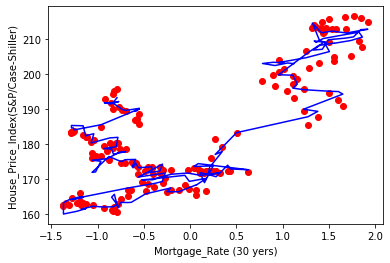

In [ ]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.96
Accuracy: 98.96 %.


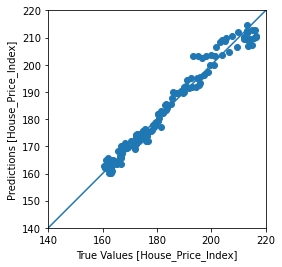

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [ ]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9748391605792599

In [ ]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,4.189514
1,-3.323450
2,-6.261539
3,-0.615671
4,8.446957
5,3.633735
6,6.294803
7,0.212111
8,2.577205
9,-1.278856


In [ ]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [ ]:
print(y_pred)

[203.09954185 203.28004985 202.55311545 203.14153954 203.48764539
 203.33640474 203.44169761 204.80489416 206.54305067 209.31659878
 206.97091829 207.2021832  209.93859117 210.38762941 210.74936317
 212.80971533 212.92608367 211.86197189 212.26531237 212.39984852
 211.91085352 214.6720789  209.63765313 209.16430069 209.57708181
 209.16985322 210.27793485 212.09362814 210.70406164 209.70977825
 208.90462702 208.97426998 208.28476692 206.4109561  199.92442219
 199.79066597 197.26795445 196.09331689 195.66142454 195.21616996
 195.11374371 194.38777205 190.06502773 189.45538741 187.91752033
 183.37068511 177.12897397 177.98892146 173.84750546 173.70046982
 174.51244033 172.75910361 172.98792434 174.06469874 170.77030291
 171.57203647 171.92941384 169.08126211 174.03496039 173.74391076
 171.15445266 171.93302923 171.14677722 171.81979299 171.47926315
 170.62963302 169.88992691 169.8918667  170.01381907 171.16839275
 169.43991547 170.29627006 168.40852995 168.46922189 166.47367868
 166.49608

In [ ]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,203.099542
1,203.280050
2,202.553115
3,203.141540
4,203.487645
...,...
149,191.581270
150,191.869072
151,191.926408
152,192.413778


In [ ]:
X_transpose=X.transpose()

In [ ]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,1.446086,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
Personal_Income,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,...,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786
Resident_Population,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,...,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543
Unemployment_Rate,-0.876552,-0.876552,-0.931203,-0.876552,-0.876552,-0.821901,-0.767249,-0.767249,-0.767249,-0.821901,...,-1.095158,-1.040506,-1.040506,-0.985855,-0.985855,-0.985855,-0.985855,-1.040506,-1.040506,-1.095158
GDP,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,...,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134
Crime_Rate,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,...,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786
Median_Debt,-3.072229,-3.072229,-3.072229,-2.936371,-2.936371,-2.936371,-2.640680,-2.640680,-2.640680,-2.273384,...,0.159591,0.159591,0.159591,0.201254,0.201254,0.201254,0.223525,0.223525,0.223525,0.194542
New_Structures,1.036374,0.538149,0.658488,0.469554,0.471376,0.946813,0.641884,0.354601,0.432631,0.492449,...,0.649269,-0.250043,0.869497,0.170526,0.240046,-0.145864,-0.227981,0.019315,0.221661,-0.033046
Economic_Conditions_Index,0.021764,0.280726,0.214135,0.095753,0.103152,-0.089219,-0.318585,-0.274191,-0.067022,0.080955,...,0.147545,0.243731,0.325119,0.524889,0.502692,0.413906,0.317720,0.132748,0.258529,0.332518
CPI less shelter,-2.191989,-2.114874,-2.076316,-2.138008,-2.014624,-1.852683,-1.528801,-1.605916,-1.713876,-1.814126,...,1.024395,1.042903,1.053313,1.081615,0.987226,0.993395,1.148550,1.082386,1.051463,1.044599


In [ ]:
X_transpose=X_transpose.reset_index()

In [ ]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
1,Personal_Income,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,-1.714020,...,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786,1.958786
2,Resident_Population,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,-1.581779,...,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543,1.220543
3,Unemployment_Rate,-0.876552,-0.876552,-0.931203,-0.876552,-0.876552,-0.821901,-0.767249,-0.767249,-0.767249,...,-1.095158,-1.040506,-1.040506,-0.985855,-0.985855,-0.985855,-0.985855,-1.040506,-1.040506,-1.095158
4,GDP,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,-1.432519,...,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134,1.762134
5,Crime_Rate,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,2.000019,...,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786,-1.023786
6,Median_Debt,-3.072229,-3.072229,-3.072229,-2.936371,-2.936371,-2.936371,-2.640680,-2.640680,-2.640680,...,0.159591,0.159591,0.159591,0.201254,0.201254,0.201254,0.223525,0.223525,0.223525,0.194542
7,New_Structures,1.036374,0.538149,0.658488,0.469554,0.471376,0.946813,0.641884,0.354601,0.432631,...,0.649269,-0.250043,0.869497,0.170526,0.240046,-0.145864,-0.227981,0.019315,0.221661,-0.033046
8,Economic_Conditions_Index,0.021764,0.280726,0.214135,0.095753,0.103152,-0.089219,-0.318585,-0.274191,-0.067022,...,0.147545,0.243731,0.325119,0.524889,0.502692,0.413906,0.317720,0.132748,0.258529,0.332518
9,CPI less shelter,-2.191989,-2.114874,-2.076316,-2.138008,-2.014624,-1.852683,-1.528801,-1.605916,-1.713876,...,1.024395,1.042903,1.053313,1.081615,0.987226,0.993395,1.148550,1.082386,1.051463,1.044599


In [ ]:
X_transpose_index=X_transpose[['index']]

In [ ]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [ ]:
X_transpose_index=X_transpose_index.join(coef)

In [ ]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),4.189514
1,Personal_Income,-3.323450
2,Resident_Population,-6.261539
3,Unemployment_Rate,-0.615671
4,GDP,8.446957
5,Crime_Rate,3.633735
6,Median_Debt,6.294803
7,New_Structures,0.212111
8,Economic_Conditions_Index,2.577205
9,CPI less shelter,-1.278856


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

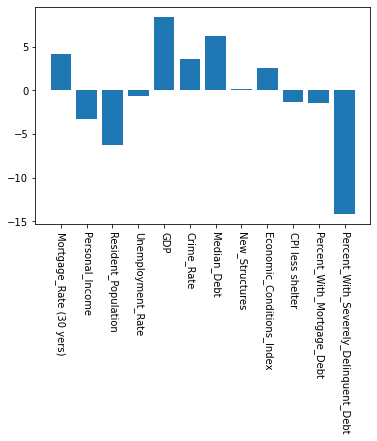

In [ ]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [ ]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,1/1/2018,187.094273,4.03,76565,19276.644,4.3,1799148.324,538,27.70%,245359,2.40%,4598.873831,2.90,230.297
1,2/1/2018,187.317164,4.33,76565,19276.644,4.3,1799148.324,538,27.70%,245359,2.40%,4467.467264,2.94,232.256
2,3/1/2018,188.763919,4.44,76565,19276.644,4.2,1799148.324,538,28.10%,244424,2.20%,3745.519561,2.77,231.599
3,4/1/2018,189.525485,4.47,76565,19276.644,4.1,1799148.324,538,28.10%,244424,2.20%,4214.956696,2.72,232.455
4,5/1/2018,189.956917,4.59,76565,19276.644,4.1,1799148.324,538,28.10%,244424,2.20%,3579.048955,2.69,233.694
5,6/1/2018,190.052705,4.57,76565,19276.644,4.0,1799148.324,538,27.60%,244131,2.00%,3977.728696,2.58,234.083
6,7/1/2018,190.840081,4.53,76565,19276.644,3.9,1799148.324,538,27.60%,244131,2.00%,4260.503262,2.32,233.478
7,8/1/2018,191.882768,4.55,76565,19276.644,3.8,1799148.324,538,27.60%,244131,2.00%,5090.556959,2.62,233.643
8,9/1/2018,192.949840,4.63,76565,19276.644,3.8,1799148.324,538,27.80%,245242,1.90%,4911.314579,2.92,234.836
9,10/1/2018,194.414177,4.83,76565,19276.644,3.8,1799148.324,538,27.80%,245242,1.90%,6074.946755,2.96,234.245


In [ ]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2018,187.094273,4.03,76565,19276.644,4.3,1799148.324,538,245359,4598.873831,2.90,230.297,27.7,2.4
1,2/1/2018,187.317164,4.33,76565,19276.644,4.3,1799148.324,538,245359,4467.467264,2.94,232.256,27.7,2.4
2,3/1/2018,188.763919,4.44,76565,19276.644,4.2,1799148.324,538,244424,3745.519561,2.77,231.599,28.1,2.2
3,4/1/2018,189.525485,4.47,76565,19276.644,4.1,1799148.324,538,244424,4214.956696,2.72,232.455,28.1,2.2
4,5/1/2018,189.956917,4.59,76565,19276.644,4.1,1799148.324,538,244424,3579.048955,2.69,233.694,28.1,2.2


In [ ]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.03,76565,19276.644,4.3,1799148.324,538,245359,4598.873831,2.90,230.297,27.7,2.4
1,4.33,76565,19276.644,4.3,1799148.324,538,245359,4467.467264,2.94,232.256,27.7,2.4
2,4.44,76565,19276.644,4.2,1799148.324,538,244424,3745.519561,2.77,231.599,28.1,2.2
3,4.47,76565,19276.644,4.1,1799148.324,538,244424,4214.956696,2.72,232.455,28.1,2.2
4,4.59,76565,19276.644,4.1,1799148.324,538,244424,3579.048955,2.69,233.694,28.1,2.2
5,4.57,76565,19276.644,4.0,1799148.324,538,244131,3977.728696,2.58,234.083,27.6,2.0
6,4.53,76565,19276.644,3.9,1799148.324,538,244131,4260.503262,2.32,233.478,27.6,2.0
7,4.55,76565,19276.644,3.8,1799148.324,538,244131,5090.556959,2.62,233.643,27.6,2.0
8,4.63,76565,19276.644,3.8,1799148.324,538,245242,4911.314579,2.92,234.836,27.8,1.9
9,4.83,76565,19276.644,3.8,1799148.324,538,245242,6074.946755,2.96,234.245,27.8,1.9


In [ ]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.540000e+00,2.202891e-01,4.030000e+00,4.462500e+00,4.560000e+00,4.632500e+00,4.870000e+00
Personal_Income,12.0,7.656500e+04,0.000000e+00,7.656500e+04,7.656500e+04,7.656500e+04,7.656500e+04,7.656500e+04
Resident_Population,12.0,1.927664e+04,0.000000e+00,1.927664e+04,1.927664e+04,1.927664e+04,1.927664e+04,1.927664e+04
Unemployment_Rate,12.0,4.000000e+00,1.954017e-01,3.800000e+00,3.800000e+00,3.950000e+00,4.125000e+00,4.300000e+00
GDP,12.0,1.799148e+06,2.431837e-10,1.799148e+06,1.799148e+06,1.799148e+06,1.799148e+06,1.799148e+06
Crime_Rate,12.0,5.380000e+02,0.000000e+00,5.380000e+02,5.380000e+02,5.380000e+02,5.380000e+02,5.380000e+02
Median_Debt,12.0,2.447405e+05,5.166246e+02,2.441310e+05,2.443508e+05,2.446005e+05,2.452420e+05,2.453590e+05
New_Structures,12.0,4.670331e+03,8.507526e+02,3.579049e+03,4.155650e+03,4.533171e+03,4.956125e+03,6.341929e+03
Economic_Conditions_Index,12.0,2.780000e+00,2.040945e-01,2.320000e+00,2.672500e+00,2.835000e+00,2.925000e+00,3.020000e+00
CPI less shelter,12.0,2.329630e+02,1.299083e+00,2.302970e+02,2.321640e+02,2.332800e+02,2.337913e+02,2.348360e+02


In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.712375,2.437321,0.974966,-1.149809,2.287922,-1.963334,0.194542,0.494371,0.399108,1.154565,-2.138567,-0.832541
1,-0.423295,2.437321,0.974966,-1.149809,2.287922,-1.963334,0.194542,0.437538,0.428703,1.305633,-2.138567,-0.832541
2,-0.317299,2.437321,0.974966,-1.204461,2.287922,-1.963334,0.094912,0.125297,0.302922,1.254969,-1.935740,-0.916835
3,-0.288391,2.437321,0.974966,-1.259112,2.287922,-1.963334,0.094912,0.328328,0.265928,1.320979,-1.935740,-0.916835
4,-0.172759,2.437321,0.974966,-1.259112,2.287922,-1.963334,0.094912,0.053299,0.243731,1.416524,-1.935740,-0.916835
5,-0.192031,2.437321,0.974966,-1.313763,2.287922,-1.963334,0.063692,0.225727,0.162343,1.446522,-2.189273,-1.001129
6,-0.230575,2.437321,0.974966,-1.368415,2.287922,-1.963334,0.063692,0.348027,-0.030028,1.399868,-2.189273,-1.001129
7,-0.211303,2.437321,0.974966,-1.423066,2.287922,-1.963334,0.063692,0.707023,0.191939,1.412592,-2.189273,-1.001129
8,-0.134215,2.437321,0.974966,-1.423066,2.287922,-1.963334,0.182075,0.629501,0.413906,1.504590,-2.087860,-1.043276
9,0.058504,2.437321,0.974966,-1.423066,2.287922,-1.963334,0.182075,1.132770,0.443501,1.459015,-2.087860,-1.043276


In [ ]:
y_pred_2 = regressor.predict(X_2)


In [ ]:
print(y_pred_2)

[194.82557389 195.90770118 196.3337223  196.35178472 196.59849517
 197.70949961 197.17149191 197.91780802 199.87444884 200.92315667
 201.14754911 200.62996128]


In [ ]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,194.825574
1,195.907701
2,196.333722
3,196.351785
4,196.598495
5,197.709500
6,197.171492
7,197.917808
8,199.874449
9,200.923157
